In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error,mean_absolute_percentage_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import precision_recall_fscore_support
from sklearn.tree import plot_tree
import math 

data=pd.read_csv("/niftydata_5daylag_17797_.csv")
data.describe()



,nifty_close,lag1,lag2,lag3,lag4,lag5
count,5661.000000,5661.000000,5661.000000,5661.000000,5661.000000,5661.000000
mean,6270.694294,6267.979182,6265.219352,6262.442660,6259.670518,6256.900318
std,4417.373167,4415.510634,4413.533057,4411.524439,4409.497576,4407.502149
min,854.200000,854.200000,854.200000,854.200000,854.200000,854.200000
25%,2367.850000,2367.800000,2367.750000,2361.550000,2361.200000,2360.150000
50%,5381.600000,5380.500000,5380.350000,5378.750000,5375.500000,5374.650000
75%,8786.200000,8780.350000,8779.850000,8778.400000,8778.300000,8778.000000
max,18477.050000,18477.050000,18477.050000,18477.050000,18477.050000,18477.050000


Linear Regression

In [ ]:
x = data[["lag1"]]
y = data["nifty_close"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
regressor = LinearRegression()
regressor.fit(x_train, y_train)
print("Intercept: ", regressor.intercept_)
print("Coefficients: ", regressor.coef_)
y_pred = regressor.predict(x_test)



Intercept:  2.2085936784023943
Coefficients:  [0.9999573]



Error matrix for linear regression

In [ ]:
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:",math.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("Mean Absolute percentage error:",mean_absolute_percentage_error(y_test, y_pred) * 100,"%")
print("R-2:", r2_score(y_test, y_pred))

MSE: 6796.76251871252
RMSE: 82.44248006163158
MAE: 52.685002573219556
Mean Absolute percentage error: 0.9509943080754195 %
R-2: 0.999658891140765


Scatter PLot

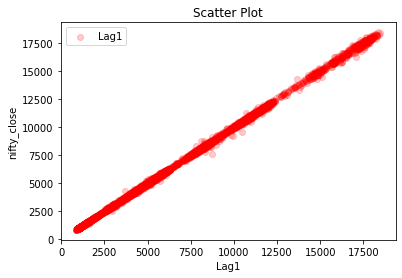

In [ ]:
plt.scatter(x, y, color = "red", label = "Lag1", alpha=0.2)

plt.xlabel('Lag1')
plt.ylabel('nifty_close')
plt.title('Scatter Plot')
plt.legend()
plt.show()

Comparison of Actual vs Predicted with plot

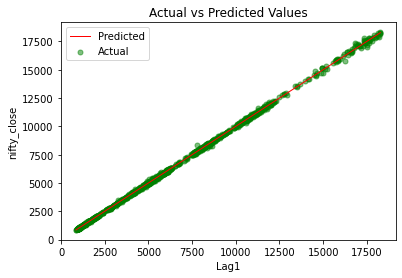

In [ ]:
X_ref = Y_ref = np.linspace(y_pred.min(), y_pred.max(), 100)
plt.scatter(x_test, y_test, color = "green", alpha = 0.5, s=25, label = "Actual")
plt.plot(X_ref, Y_ref, color='red', linewidth=1, label="Predicted")
plt.xlabel('Lag1')
plt.ylabel('nifty_close')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

Multiple Regression

In [ ]:
x = data[["lag1","lag2","lag3","lag4","lag5"]]
y = data["nifty_close"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

lr = LinearRegression()
lr.fit(x_train, y_train)
print("Intercept: ", lr.intercept_)
print("Coefficients: ", lr.coef_)
y_pred = lr.predict(x_test)

Intercept:  1.8519624522432423
Coefficients:  [ 1.00907527  0.01006388 -0.02888547  0.03860722 -0.02863254]


Error matrix for multiple regression

In [ ]:
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:",math.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("Mean Absolute percentage error:",mean_absolute_percentage_error(y_test, y_pred) * 100,"%")
print("R-2:", r2_score(y_test, y_pred))

MSE: 7251.903956236282
RMSE: 85.15811151168327
MAE: 52.79686887819443
Mean Absolute percentage error: 0.9522082339105195 %
R-2: 0.9996417234066792


Scatter PLot

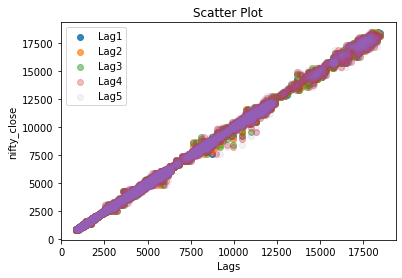

In [ ]:
plt.scatter(x["lag1"], y, label = "Lag1", alpha=0.9)
plt.scatter(x["lag2"], y, label = "Lag2", alpha=0.7)
plt.scatter(x["lag3"], y, label = "Lag3", alpha=0.5)
plt.scatter(x["lag4"], y, label = "Lag4", alpha=0.3)
plt.scatter(x["lag5"], y, label = "Lag5", alpha=0.1)
plt.xlabel('Lags')
plt.ylabel('nifty_close')
plt.title('Scatter Plot')
plt.legend()
plt.show()

Actual vs Predicted values plot

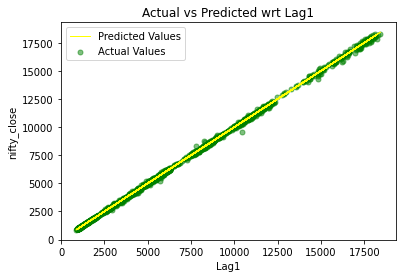

In [ ]:
X_ref = Y_ref = np.linspace(y_pred.min(), y_pred.max(), 100)
plt.scatter(x_test["lag1"], y_test, color = "green", alpha = 0.5, s=25, label = "Actual Values")
plt.plot(x_test["lag1"], y_pred, color='yellow', linewidth=1, label="Predicted Values")
plt.xlabel('Lag1')
plt.ylabel('nifty_close')
plt.title('Actual vs Predicted wrt Lag1')
plt.legend()
plt.show()

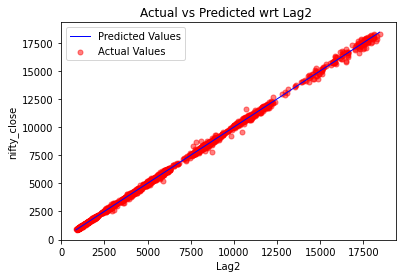

In [ ]:
plt.scatter(x_test["lag2"], y_test, color = "red", alpha = 0.5, s=25, label = "Actual Values")
plt.plot(X_ref, Y_ref, color='blue', linewidth=1, label="Predicted Values")
plt.xlabel('Lag2')
plt.ylabel('nifty_close')
plt.title('Actual vs Predicted wrt Lag2 ')
plt.legend()
plt.show()

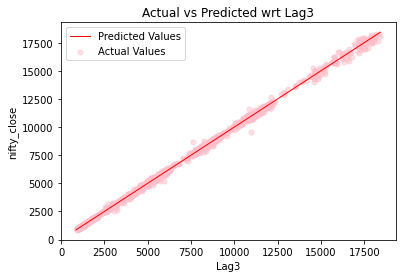

In [ ]:
plt.scatter(x_test["lag3"], y_test, color = "pink", alpha = 0.5, s=25, label = "Actual Values")
plt.plot(X_ref, Y_ref, color='red', linewidth=1, label="Predicted Values")
plt.xlabel('Lag3')
plt.ylabel('nifty_close')
plt.title('Actual vs Predicted wrt Lag3')
plt.legend()
plt.show()

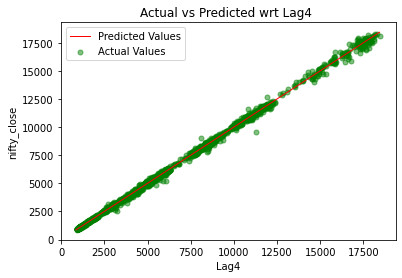

In [ ]:
plt.scatter(x_test["lag4"], y_test, color = "green", alpha = 0.5, s=25, label = "Actual Values")
plt.plot(X_ref, Y_ref, color='red', linewidth=1, label="Predicted Values")
plt.xlabel('Lag4')
plt.ylabel('nifty_close')
plt.title('Actual vs Predicted wrt Lag4 ')
plt.legend()
plt.show()

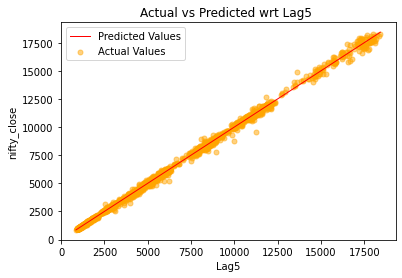

In [ ]:
plt.scatter(x_test["lag5"], y_test, color = "orange", alpha = 0.5, s=25, label = "Actual Values")
plt.plot(X_ref, Y_ref, color='red', linewidth=1, label="Predicted Values")
plt.xlabel('Lag5')
plt.ylabel('nifty_close')
plt.title('Actual vs Predicted wrt Lag5 ')
plt.legend()
plt.show()

Decision Tree

In [ ]:
x = data[["lag1","lag2","lag3","lag4","lag5"]]
y = data["nifty_close"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

print("test set Model performance : ", regressor.score(x_test, y_test))

test set Model performance :  0.9992776905086582


Error matrix for Decision tree

In [ ]:
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:",math.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("Mean Absolute percentage error:",mean_absolute_percentage_error(y_test, y_pred) * 100,"%")
print("R-2:", r2_score(y_test, y_pred))

MSE: 14242.84877575044
RMSE: 119.34340692200152
MAE: 77.13678634490877
Mean Absolute percentage error: 1.4079649543183612 %
R-2: 0.9992776905086582


Decision Tree plot

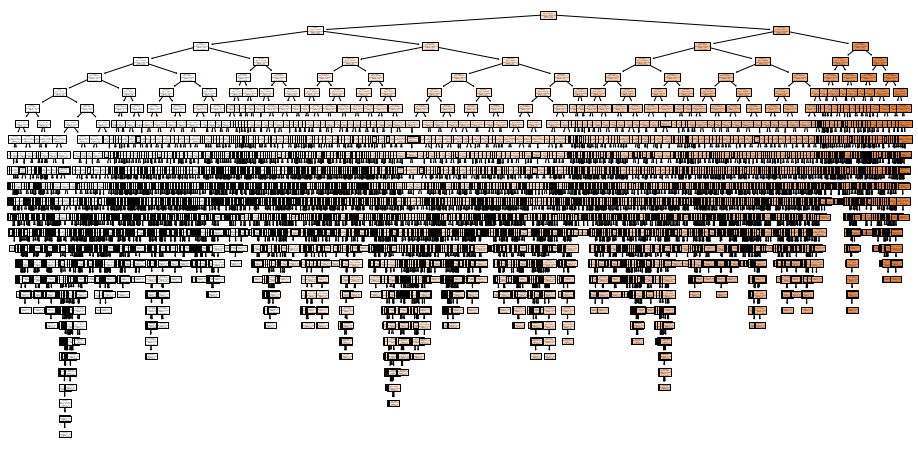

In [ ]:
plt.figure(figsize=(16, 8))
plot_tree(regressor, filled=True, node_ids=True)
plt.show()

Actual vs Model Predicted values Plot

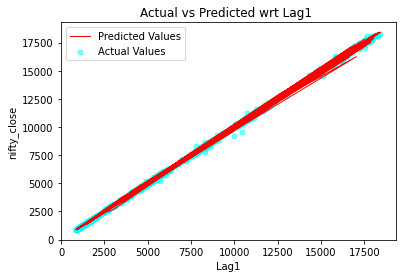

In [ ]:
plt.scatter(x_test["lag1"], y_test, color = "cyan", alpha = 0.5, s=25, label = "Actual Values")
plt.plot(x_test["lag1"], y_pred, color='red', linewidth=1, label="Predicted Values")
plt.xlabel('Lag1')
plt.ylabel('nifty_close')
plt.title('Actual vs Predicted wrt Lag1 ')
plt.legend()
plt.show()

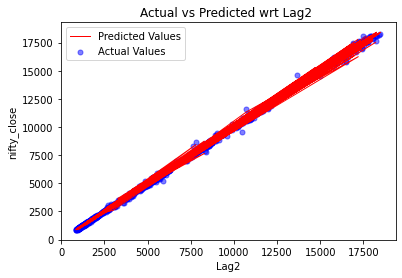

In [ ]:
plt.scatter(x_test["lag2"], y_test, color = "blue", alpha = 0.5, s=25, label = "Actual Values")
plt.plot(x_test["lag2"], y_pred, color='red', linewidth=1, label="Predicted Values")
plt.xlabel('Lag2')
plt.ylabel('nifty_close')
plt.title('Actual vs Predicted wrt Lag2 ')
plt.legend()
plt.show()

Random Forest 

Class column that divides nifty based on its range

In [ ]:
data['Class'] = np.where(data['nifty_close'] < 5000, "Very Low",
                       np.where(data['nifty_close'] < 10000, "Low",
                       np.where(data['nifty_close'] < 15000, "High",
                       "Very High")))
data

,Date,nifty_close,lag1,lag2,lag3,lag4,lag5,Class
0,10-01-2000 00:00,1632.95,1613.30,1617.60,1595.80,1638.70,1592.20,Very Low
1,11-01-2000 00:00,1572.50,1632.95,1613.30,1617.60,1595.80,1638.70,Very Low
2,12-01-2000 00:00,1624.80,1572.50,1632.95,1613.30,1617.60,1595.80,Very Low
3,13-01-2000 00:00,1621.40,1624.80,1572.50,1632.95,1613.30,1617.60,Very Low
4,14-01-2000 00:00,1622.75,1621.40,1624.80,1572.50,1632.95,1613.30,Very Low
...,...,...,...,...,...,...,...,...
5656,04-10-2022 00:00,17274.30,16887.35,17094.35,16818.10,16858.60,17007.40,Very High
5657,06-10-2022 00:00,17331.80,17274.30,16887.35,17094.35,16818.10,16858.60,Very High
5658,07-10-2022 00:00,17314.65,17331.80,17274.30,16887.35,17094.35,16818.10,Very High
5659,10-10-2022 00:00,17241.00,17314.65,17331.80,17274.30,16887.35,17094.35,Very High


Random Forest Classifier

In [ ]:
x = data[["lag1","lag2","lag3","lag4","lag5"]]
y = data["Class"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print("Training set score: ",model.score(x_train, y_train))
print("Test set score: ",model.score(x_test, y_test))

Training set score:  1.0
Test set score:  0.9811653914067098


Error Matrix for random forest

In [ ]:
acc = np.mean(y_test == y_pred)
precision, recall, f1,_ = precision_recall_fscore_support(y_test, y_pred)
print("Accuracy: ", acc)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)

Accuracy:  0.9811653914067098
Precision:  [0.9738806  0.97986577 0.98198198 0.98480663]
Recall:  [0.98490566 0.97333333 0.98198198 0.98616874]
F1 Score:  [0.9793621  0.97658863 0.98198198 0.98548721]


Plotting the model

[Text(0.3229166666666667, 0.9545454545454546, 'lag2 <= 4985.8\ngini = 0.661\nsamples = 2505\nvalue = [583, 1432, 256, 1691]\nclass = Very High'),
 Text(0.0392156862745098, 0.8636363636363636, 'lag1 <= 4918.15\ngini = 0.031\nsamples = 1075\nvalue = [0, 27, 0, 1663]\nclass = Very High'),
 Text(0.0196078431372549, 0.7727272727272727, 'gini = 0.0\nsamples = 1046\nvalue = [0, 0, 0, 1643]\nclass = Very High'),
 Text(0.058823529411764705, 0.7727272727272727, 'lag2 <= 4974.575\ngini = 0.489\nsamples = 29\nvalue = [0, 27, 0, 20]\nclass = Low'),
 Text(0.0392156862745098, 0.6818181818181818, 'lag5 <= 4659.95\ngini = 0.426\nsamples = 24\nvalue = [0, 27, 0, 12]\nclass = Low'),
 Text(0.0196078431372549, 0.5909090909090909, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 0, 3]\nclass = Very High'),
 Text(0.058823529411764705, 0.5909090909090909, 'lag2 <= 4887.675\ngini = 0.375\nsamples = 22\nvalue = [0, 27, 0, 9]\nclass = Low'),
 Text(0.0392156862745098, 0.5, 'gini = 0.0\nsamples = 5\nvalue = [0, 11, 0, 0]\

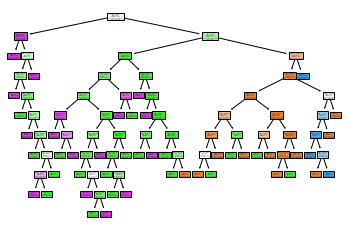

In [ ]:
plot_tree(model.estimators_[0], filled=True, feature_names=['lag1', 'lag2', 'lag3', 'lag4', 'lag5'], class_names=['Very Low','Low','High','Very High'])

Ridge Regression

In [ ]:
x = data[["lag1","lag2","lag3","lag4","lag5"]]
y = data["nifty_close"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

ridge = Ridge().fit(x_train, y_train)

y_pred = ridge.predict(x_test)

print("Intercept: ", ridge.intercept_)
print("Coefficients: ", ridge.coef_)
print("Training set score: ",ridge.score(x_train, y_train))
print("Test set score: ",ridge.score(x_test, y_test))

Intercept:  2.797354312436255
Coefficients:  [ 1.03461714 -0.04048716 -0.00141937  0.03906035 -0.03193393]
Training set score:  0.9996052024672498
Test set score:  0.9996249727625688


Error Matrix for ridge regression

In [ ]:
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:",math.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("Mean Absolute percentage error:",mean_absolute_percentage_error(y_test, y_pred) * 100,"%")
print("R-2:", r2_score(y_test, y_pred))

MSE: 7069.176513468579
RMSE: 84.07839504574632
MAE: 52.961308358703256
Mean Absolute percentage error: 0.9634311844178671 %
R-2: 0.9996249727625688


Ridge coefficients as a function of the regularization plot

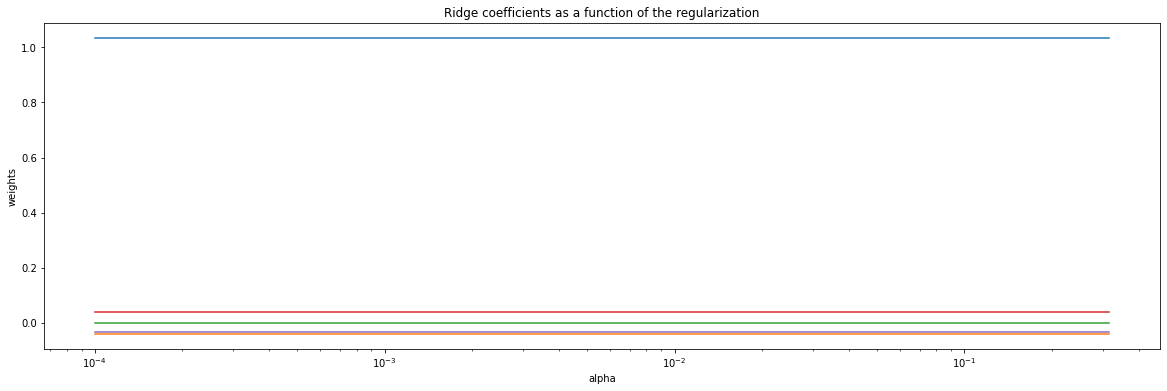

In [ ]:
alphas = np.logspace(-4, -0.5, 30)
coefs = []
for alpha in alphas:
    ridge = Ridge(alpha=alpha).fit(x_train, y_train)
    coefs.append(ridge.coef_)

plt.figure(figsize=(20, 6))
plt.plot(alphas, coefs)
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

 Actual vs Model predicted values plot

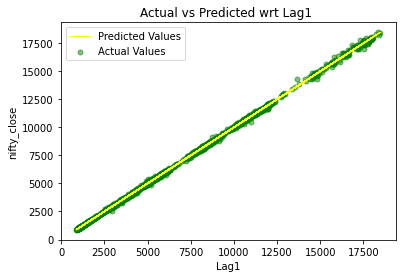

In [ ]:
plt.scatter(x_test["lag1"], y_test, color = "green", alpha = 0.5, s=25, label = "Actual Values")
plt.plot(x_test["lag1"], y_pred, color='yellow', linewidth=1, label="Predicted Values")
plt.xlabel('Lag1')
plt.ylabel('nifty_close')
plt.title('Actual vs Predicted wrt Lag1 ')
plt.legend()
plt.show()

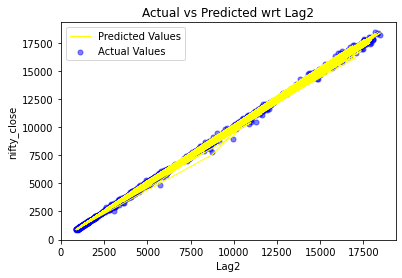

In [ ]:
plt.scatter(x_test["lag2"], y_test, color = "blue", alpha = 0.5, s=25, label = "Actual Values")
plt.plot(x_test["lag2"], y_pred, color='yellow', linewidth=1, label="Predicted Values")
plt.xlabel('Lag2')
plt.ylabel('nifty_close')
plt.title('Actual vs Predicted wrt Lag2')
plt.legend()
plt.show()

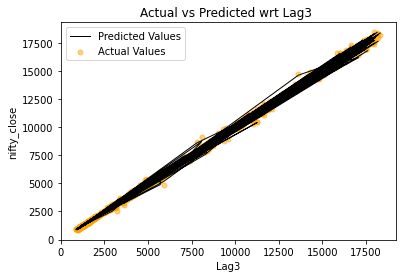

In [ ]:
plt.scatter(x_test["lag3"], y_test, color = "orange", alpha = 0.5, s=25, label = "Actual Values")
plt.plot(x_test["lag3"], y_pred, color='black', linewidth=1, label="Predicted Values")
plt.xlabel('Lag3')
plt.ylabel('nifty_close')
plt.title('Actual vs Predicted wrt Lag3 ')
plt.legend()
plt.show()

SVM

In [ ]:
x = data[["lag1","lag2","lag3","lag4","lag5"]]
y = data["nifty_close"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

model = SVR()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Intercept: ", model.intercept_)
print("Training set score: ",model.score(x_train, y_train))
print("Test set score: ",model.score(x_test, y_test))

Intercept:  [5729.06264927]
Training set score:  0.27611291307436303
Test set score:  0.2832301216925035


Error matrix for SVM

In [ ]:
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:",math.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("Mean Absolute percentage error:",mean_absolute_percentage_error(y_test, y_pred) * 100,"%")
print("R-2:", r2_score(y_test, y_pred))

MSE: 14156290.105801364
RMSE: 3762.484565523341
MAE: 2663.306085958044
Mean Absolute percentage error: 80.67398066728089 %
R-2: 0.2832301216925035


Actual vs Model Predicted plot

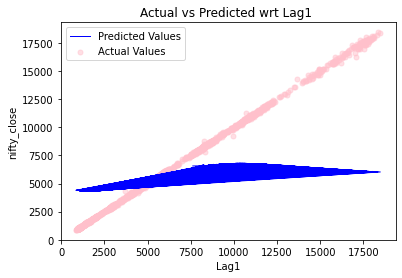

In [ ]:
plt.scatter(x_test["lag1"], y_test, color = "pink", alpha = 0.5, s=25, label = "Actual Values")
plt.plot(x_test["lag1"], y_pred, color='blue', linewidth=1, label="Predicted Values")
plt.xlabel('Lag1')
plt.ylabel('nifty_close')
plt.title('Actual vs Predicted wrt Lag1 ')
plt.legend()
plt.show()

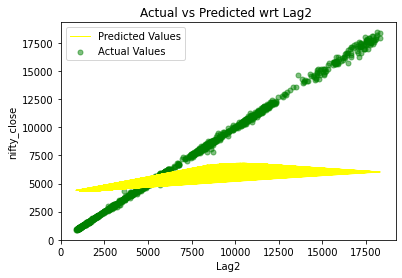

In [ ]:
plt.scatter(x_test["lag2"], y_test, color = "green", alpha = 0.5, s=25, label = "Actual Values")
plt.plot(x_test["lag2"], y_pred, color='yellow', linewidth=1, label="Predicted Values")
plt.xlabel('Lag2')
plt.ylabel('nifty_close')
plt.title('Actual vs Predicted wrt Lag2 ')
plt.legend()
plt.show()

KNN

In [ ]:
x = data[["lag1","lag2","lag3","lag4","lag5"]]
y = data["nifty_close"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

mknn = KNeighborsRegressor(n_neighbors=5)
mknn.fit(x_train, y_train)

y_pred = mknn.predict(x_test)
print("Training set score: ",mknn.score(x_train, y_train))
print("Test set score: ",mknn.score(x_test, y_test))

Training set score:  0.9996378493135779
Test set score:  0.9993748658201573


 Error matrix for KNN

In [ ]:
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:",math.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("Mean Absolute percentage error:",mean_absolute_percentage_error(y_test, y_pred) * 100,"%")
print("R-2:", r2_score(y_test, y_pred))

MSE: 11550.7778400824
RMSE: 107.47454507967177
MAE: 66.10429075927016
Mean Absolute percentage error: 1.1962128249805892 %
R-2: 0.9993748658201573


Actual vs model predicted values plot

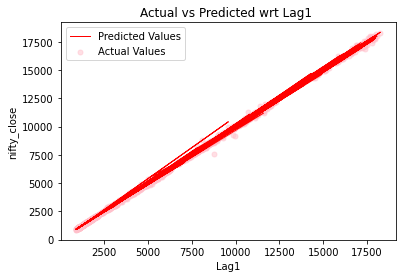

In [ ]:
plt.scatter(x_test["lag1"], y_test, color = "pink", alpha = 0.5, s=25, label = "Actual Values")
plt.plot(x_test["lag1"], y_pred, color='red', linewidth=1, label="Predicted Values")
plt.xlabel('Lag1')
plt.ylabel('nifty_close')
plt.title('Actual vs Predicted wrt Lag1 ')
plt.legend()
plt.show()

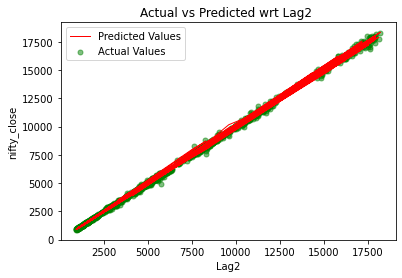

In [ ]:
plt.scatter(x_test["lag2"], y_test, color = "green", alpha = 0.5, s=25, label = "Actual Values")
plt.plot(x_test["lag2"], y_pred, color='red', linewidth=1, label="Predicted Values")
plt.xlabel('Lag2')
plt.ylabel('nifty_close')
plt.title('Actual vs Predicted wrt Lag2 ')
plt.legend()
plt.show()